In [1]:
import pandas as pd
import time 
import json
import urllib.request
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
#matplotlib inline

In [2]:
with urllib.request.urlopen("https://alte-rs.ddnss.de/weather/processed/history.json") as url:
    data1 = json.loads(url.read().decode())

In [3]:
df = pd.DataFrame(data=data1)

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df['temp'] = pd.to_numeric(df['temp'])

In [6]:
df['pressure'] = pd.to_numeric(df['pressure'])

In [7]:
df['humidity'] = pd.to_numeric(df['humidity'])

In [8]:
df2 = df.set_index('time')

In [9]:
series = df2.rolling('10Min',min_periods=5).mean()

In [10]:
total =[df2,series]

In [11]:
testseries = series

In [12]:
init = testseries.index[0]

## Hier reduzieren wir die Datenmenge indem wir ein Datenpunkt pro 5 Min sampeln

In [13]:
for time in testseries.index:
    if time-init > timedelta(minutes = 5):
        init = time
    else:
        testseries = testseries.drop(time)
        
        
   
    

In [14]:
Y = testseries[40:]

Hier haben wir die Targetvariable selektiert

In [15]:
Y.head()

,humidity,pressure,temp
time,,,
2018-06-22 19:55:04.795,48.219115,1025.583542,26.473291
2018-06-22 20:00:19.935,48.285611,1025.611313,26.399506
2018-06-22 20:05:35.175,48.080302,1025.680405,26.422209
2018-06-22 20:10:50.555,47.475388,1025.720459,26.447182
2018-06-22 20:16:06.745,47.111524,1025.721176,26.433560


In [16]:
length = len(testseries)

In [17]:
print(length)

6739


Jetzt gehts los

In [18]:
testseries.loc[testseries.index[0]]

humidity      35.743404
pressure    1025.125806
temp          28.879808
Name: 2018-06-22 16:25:30.796000, dtype: float64

In [19]:
x = np.zeros((length-40, 60))

In [20]:

testseries.loc[testseries.index[0]]

humidity      35.743404
pressure    1025.125806
temp          28.879808
Name: 2018-06-22 16:25:30.796000, dtype: float64

In [21]:
for row in range(0,length-40):
    for width in range(0,20):
        for i in range(0,3):
            x[row,3*width+i]= testseries.loc[testseries.index[row + width]][i]

In [22]:
#y = Y.values

In [23]:
print(x[0])

[  35.74340363 1025.12580566   28.87980804   36.05182481 1025.12454224
   28.80261767   37.18123507 1025.16242981   28.50634348   38.23916078
 1025.22750855   28.17601526   38.70193815 1025.25201416   28.10563624
   38.80667138 1025.24931335   28.12606895   39.74220109 1025.2592926
   28.00801361   41.21469355 1025.24116516   27.95125592   41.23526621
 1025.24137878   28.0386622    40.85664916 1025.30384827   28.14196074
   41.30654287 1025.39454651   28.10450077   42.24124122 1025.43695068
   27.94558001   42.72355247 1025.41156006   27.84909236   42.88023663
 1025.38156128   27.74465859   42.69051218 1025.36283874   27.71741498
   42.69549942 1025.33816528   27.80709195   43.09655976 1025.32145691
   27.85590339   43.4963727  1025.32043457   27.89449847   43.42530394
 1025.33094788   27.90017414   43.56349325 1025.36236572   27.83774066]


In [24]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(x)
x = imputer.transform(x)
imputer = imputer.fit(Y)
Y = pd.DataFrame(dict(zip(Y.axes[1].values.tolist(), imputer.transform(Y).T)), index=Y.index)

In [26]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 1/3, random_state = 0)


y_train = Y[0:4639]
X_train = x[0:4639]
y_test = Y[4640:]
X_test = x[4640:]

In [27]:
X_train

array([[  35.74340363, 1025.12580566,   28.87980804, ...,   43.56349325,
        1025.36236572,   27.83774066],
       [  36.05182481, 1025.12454224,   28.80261767, ...,   44.60126185,
        1025.37701416,   27.75600994],
       [  37.18123507, 1025.16242981,   28.50634348, ...,   45.12243223,
        1025.38113403,   27.70379305],
       ...,
       [  37.69284678, 1024.23907471,   31.16145873, ...,   41.33397341,
        1024.42199707,   29.79246831],
       [  37.63881826, 1024.26690674,   31.00934887, ...,   40.72552538,
        1024.46591187,   29.96501112],
       [  37.68453503, 1024.28274536,   30.91626644, ...,   39.89805317,
        1024.49581909,   30.14209414]])

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [43]:
X_train = sc_X.fit_transform(X_train)

In [44]:
X_test = sc_X.fit_transform(X_test)
y_test_c = y_test
y_train_c=y_train
#y_test = pd.DataFrame(dict(zip(y_test.axes[1].values.tolist(), sc_X.fit_transform(y_test).T)), index=y_test_c.index)
#y_train = pd.DataFrame(dict(zip(y_train.axes[1].values.tolist(), sc_X.fit_transform(y_train).T)), index=y_train_c.index)


In [45]:
X_train

array([[-0.34107441,  0.24928413, -0.85708159, ...,  0.56192025,
         0.31862594, -1.13842027],
       [-0.30549272,  0.24891991, -0.87758493, ...,  0.6816727 ,
         0.32284955, -1.16017026],
       [-0.1751958 ,  0.25984215, -0.95628141, ...,  0.74181273,
         0.32403744, -1.17406609],
       ...,
       [-0.11617258, -0.00634291, -0.25102852, ...,  0.30464665,
         0.04748786, -0.61823281],
       [-0.1224057 ,  0.00168051, -0.29143201, ...,  0.2344353 ,
         0.06014989, -0.57231613],
       [-0.11713149,  0.00624647, -0.3161566 , ...,  0.13894983,
         0.06877309, -0.52519122]])

In [57]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train['temp'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
regressor.coef_

array([ -0.79528808,  -1.21388471,  -1.68202278,   0.58227086,
         0.44154683,   0.03452228,  -0.54993006,  -0.84092709,
        -0.71322363,   0.32267655,   0.28520291,   0.3400042 ,
        -0.12874949,  -0.407326  ,  -0.05889647,   0.18667472,
         1.30172468,   0.3211832 ,   0.34047989,  -0.48532829,
        -0.12732476,   0.15275152,   0.66635074,  -0.03576286,
         0.04010867,  -0.77731928,  -0.34491865,  -0.14528133,
         1.48208889,  -0.14061757,   0.27189123,  -2.55754305,
        -0.44518493,  -0.45054242,   3.08072036,   0.17688146,
         0.39941496,  -4.6171118 ,  -0.75544728,   0.04096929,
         5.64325528,   0.72116203,   0.36179831,  -7.26674397,
        -1.48985657,   0.10359066,  10.46744269,   1.2748884 ,
         0.05609516, -13.0601013 ,  -2.83929981,   0.16607366,
        18.3376454 ,   2.95718698,  -1.40098163, -22.39518041,
        -4.7124768 ,   0.22883834,  11.88459679,  10.62046375])

In [81]:
regressor.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

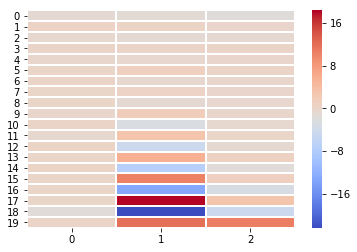

In [78]:
sn.heatmap(regressor.coef_.reshape(20,3),cmap='coolwarm',linewidths=1)

In [76]:
regressor.coef_.reshape(20,3)

array([[ -0.79528808,  -1.21388471,  -1.68202278],
       [  0.58227086,   0.44154683,   0.03452228],
       [ -0.54993006,  -0.84092709,  -0.71322363],
       [  0.32267655,   0.28520291,   0.3400042 ],
       [ -0.12874949,  -0.407326  ,  -0.05889647],
       [  0.18667472,   1.30172468,   0.3211832 ],
       [  0.34047989,  -0.48532829,  -0.12732476],
       [  0.15275152,   0.66635074,  -0.03576286],
       [  0.04010867,  -0.77731928,  -0.34491865],
       [ -0.14528133,   1.48208889,  -0.14061757],
       [  0.27189123,  -2.55754305,  -0.44518493],
       [ -0.45054242,   3.08072036,   0.17688146],
       [  0.39941496,  -4.6171118 ,  -0.75544728],
       [  0.04096929,   5.64325528,   0.72116203],
       [  0.36179831,  -7.26674397,  -1.48985657],
       [  0.10359066,  10.46744269,   1.2748884 ],
       [  0.05609516, -13.0601013 ,  -2.83929981],
       [  0.16607366,  18.3376454 ,   2.95718698],
       [ -1.40098163, -22.39518041,  -4.7124768 ],
       [  0.22883834,  11.88459

In [83]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_train_p = regressor.predict(X_train)

import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train['temp'], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     848.3
Date:                Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:05:51   Log-Likelihood:                -6925.1
No. Observations:                4639   AIC:                         1.397e+04
Df Residuals:                    4578   BIC:                         1.437e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.1252      0.016   2018.861      0.0

In [60]:
#data = np.array([y_pred[:,0], y_pred[:,1], y_pred[:,2], y_test['temp'].values, y_test['pressure'].values, y_test['humidity'].values]).T
#data_ins = np.array([y_train_p[:,0], y_train_p[:,1], y_train_p[:,2], y_train['temp'].values, y_train['pressure'].values, y_train['humidity'].values])

In [61]:
data = np.array([y_pred, y_test['temp'].values])
data_ins = np.array([y_train_p, y_train['temp'].values])

In [62]:
#keys=['temp_tr', 'pressure_tr', 'hum_tr','temp_pr', 'pressure_pr', 'hum_pr']


#resultset = pd.DataFrame(dict(zip(keys,data.T)), index = y_test.index)
#resultset_train = pd.DataFrame(dict(zip(keys,data_ins)), index = y_train.index)

In [63]:
keys=['temp_tr', 'temp_pr']


resultset = pd.DataFrame(dict(zip(keys,data)), index = y_test.index)
resultset_train = pd.DataFrame(dict(zip(keys,data_ins)), index = y_train.index)

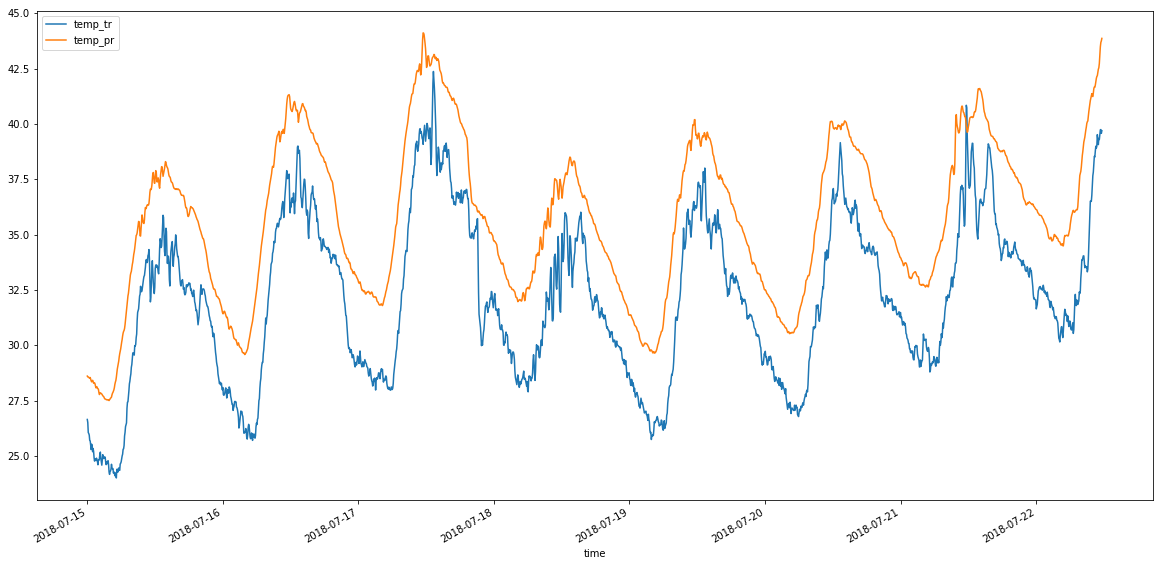

In [64]:
resultset.plot.line(y = ['temp_tr', 'temp_pr'], figsize=(20,10))

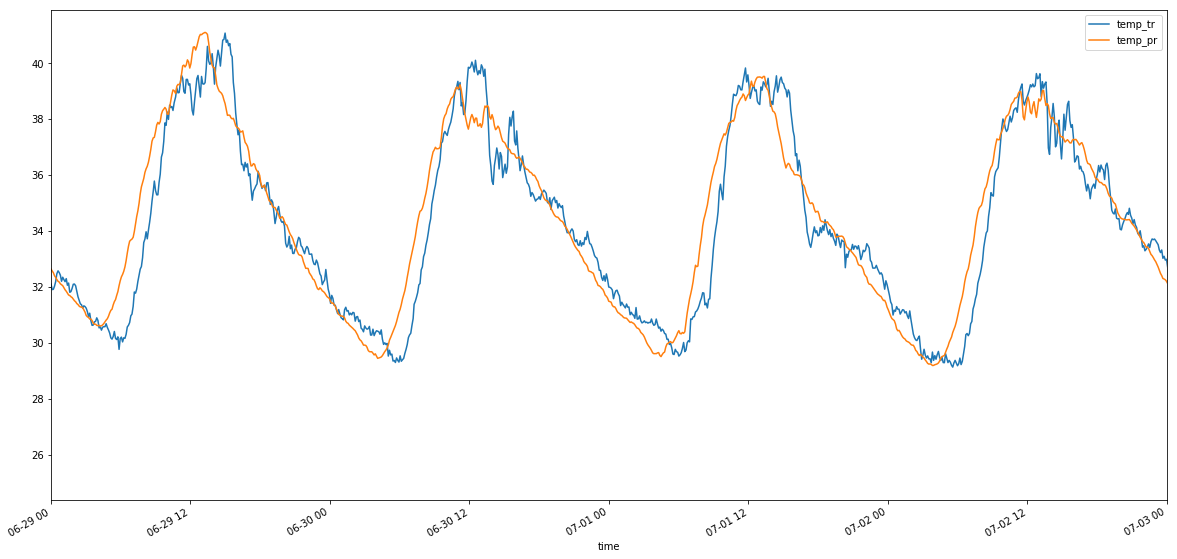

In [65]:
resultset_train.plot.line(y = ['temp_tr', 'temp_pr'], figsize=(20,10), xlim=['20180629','20180703'])

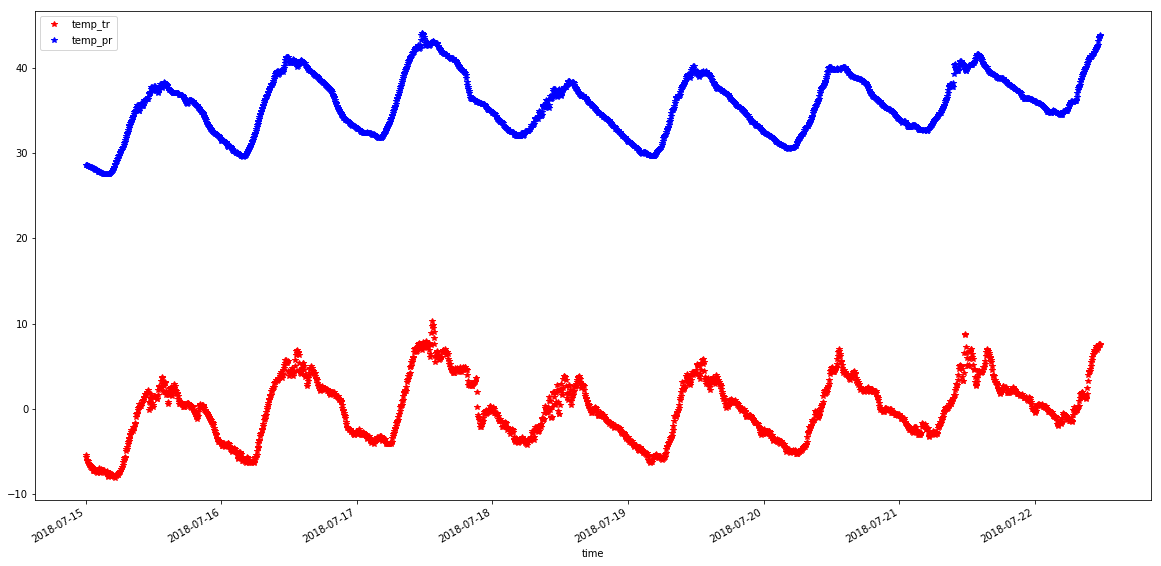

In [56]:
resultset.plot(y = ['temp_tr','temp_pr'], figsize=(20,10),style = ['r*','b*'])

In [42]:
resultset.plot.line(y = ['pressure_tr', 'pressure_pr'], figsize=(20,10))

KeyError: "['pressure_tr' 'pressure_pr'] not in index"

In [ ]:
resultset.plot.line(y = ['hum_tr', 'hum_pr'], figsize=(20,10))

In [ ]:
y_test.index.values

In [ ]:
plt.plot((y_test['temp']-y_pred[:,0]).sort_index())

In [ ]:
(abs(y_test['temp']-y_pred[:,0])).sum()/len(y_test['temp']-y_pred[:,0])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test['temp'], y_pred)

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring= 'neg_mean_squared_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
title = "Learning Curves Our model"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(regressor, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [ ]:
plt.

Fazit: Das System lernt doch!

In [ ]:
y_test[0]

In [ ]:
y_pred[0]

In [ ]:
y_test[126]

In [ ]:
y_pred[126]

In [ ]:
len(y_train[:,0])

In [ ]:
plt.scatter(X_train[:,0], y_train[:,0], color = 'red')
plt.scatter(X_train[:,0], regressor.predict(X_train)[:,0], color = 'blue')
plt.title('Temp Future vs. Past (Training set)')
plt.xlabel('Temperature X')
plt.ylabel('Temperature Y')
plt.show()



In [ ]:
# Visualising the Test set results
plt.scatter( y_test[:,0],y_pred[:,0], color = 'red')
plt.title('Temp True vs. Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [ ]:
plt.scatter( y_test[:,1],y_pred[:,1], color = 'blue')
plt.title('press True vs. Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [ ]:
plt.scatter( y_test[:,2],y_pred[:,2], color = 'green')
plt.title('Humid True vs. Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [ ]:
len(y_pred)